In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import functions
from importlib import reload
reload(functions)

import warnings
warnings.filterwarnings('ignore')


In [3]:
aggregated_df = pd.read_csv("data/aggregated_df.csv")
heart_rate_df = pd.read_csv("data/heart_rate.csv")

x_heart_rate_df = pd.read_csv('data/x_heart_rate.csv')
x_sleep_df = pd.read_csv('data/x_sleep.csv')

a_heart_rate_df = pd.read_csv('data/a_heart_rate.csv')
a_sleep_df = pd.read_csv('data/a_sleep.csv')

### Time series graphs 

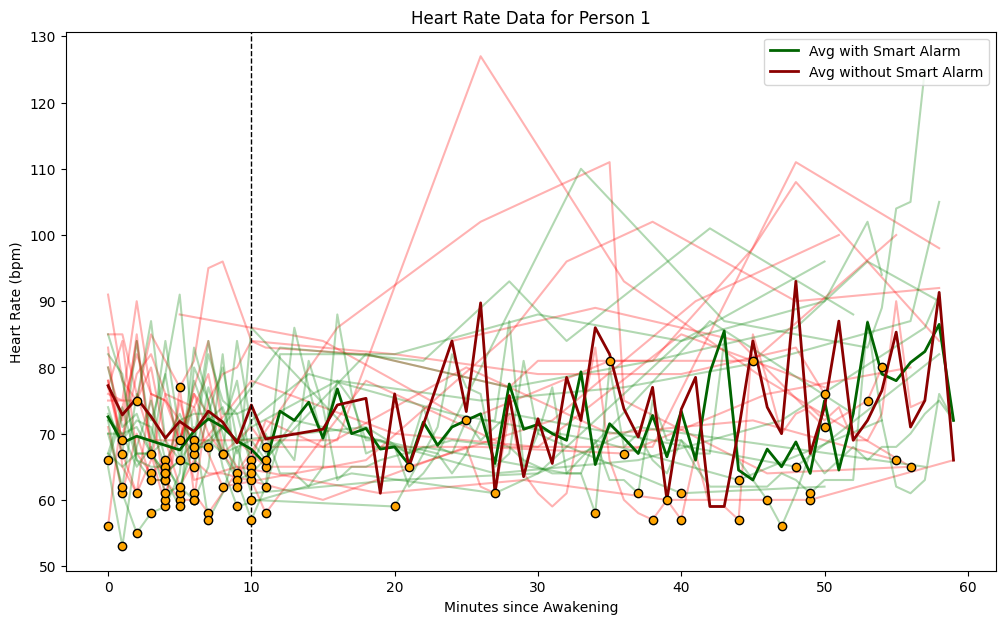

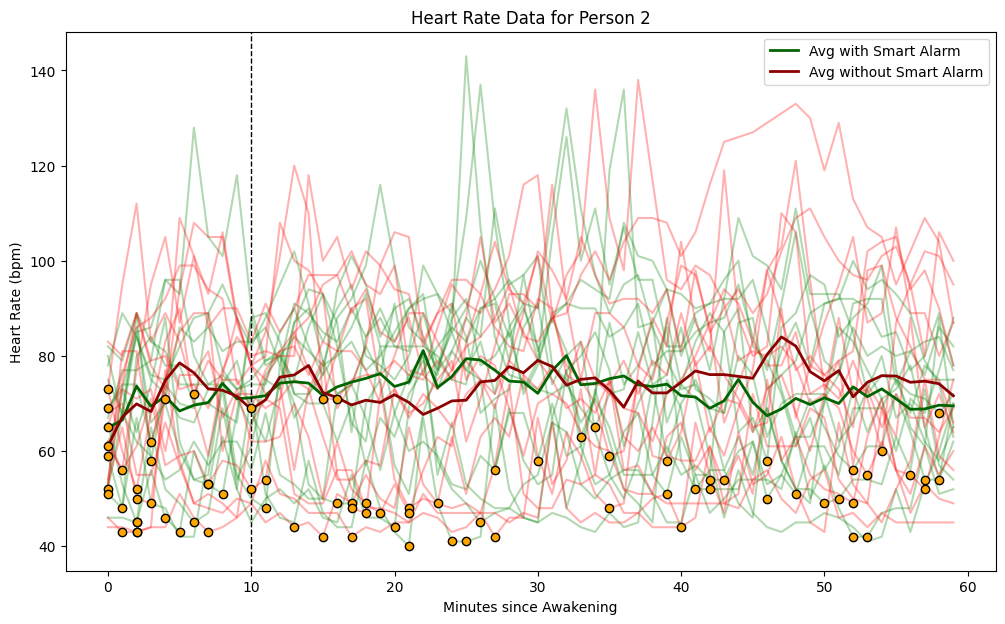

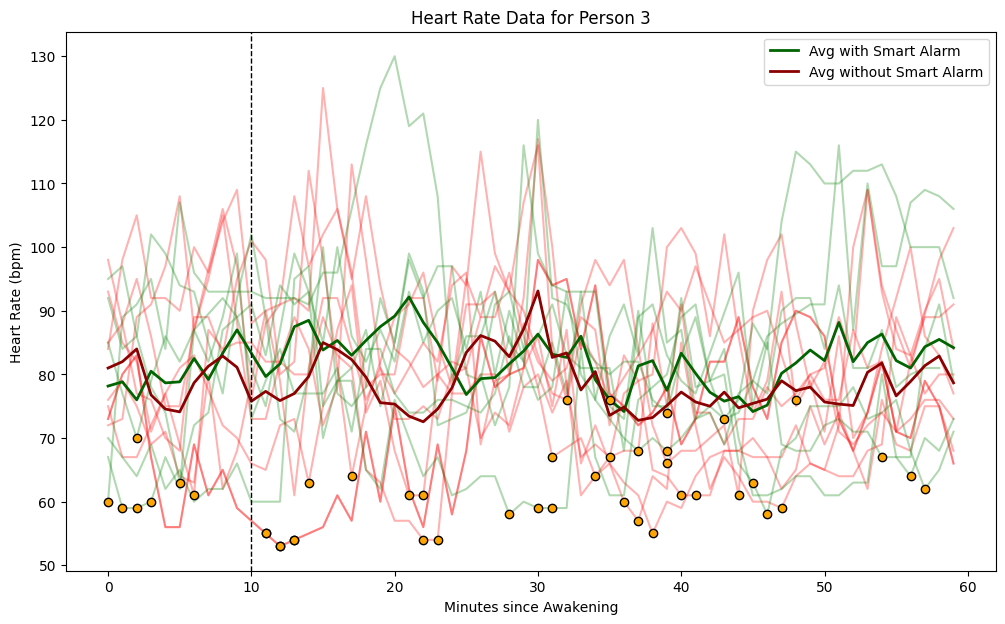

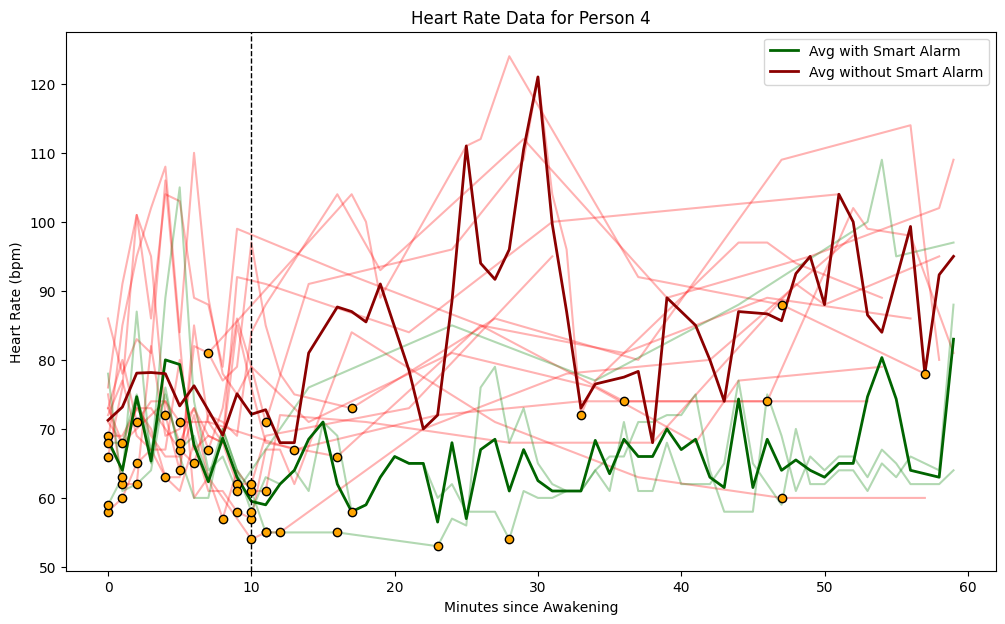

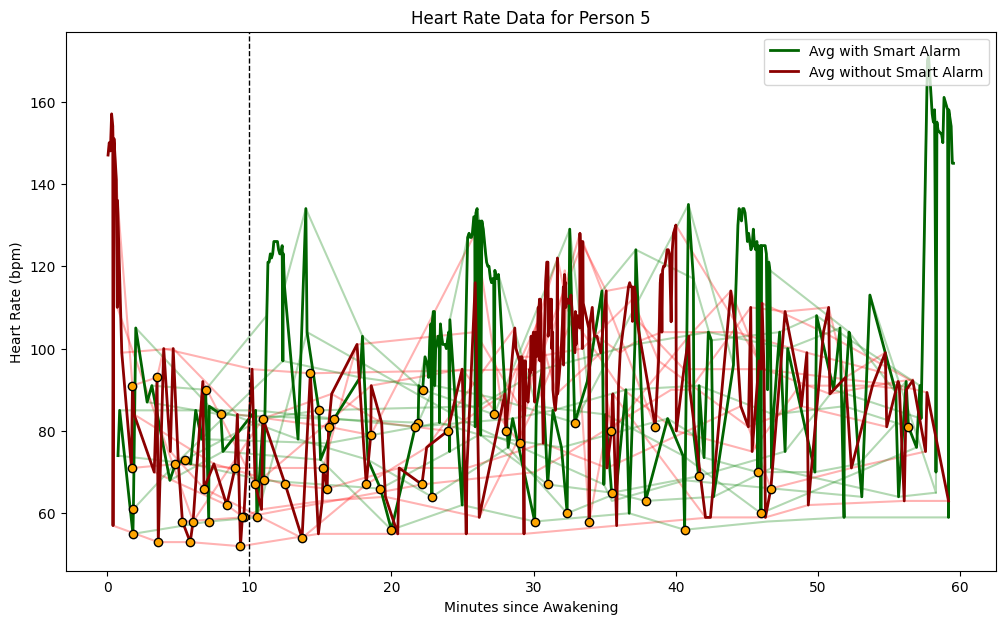

In [29]:
functions.make_timeserie_graphs()

### Frequency of heart rate observations 

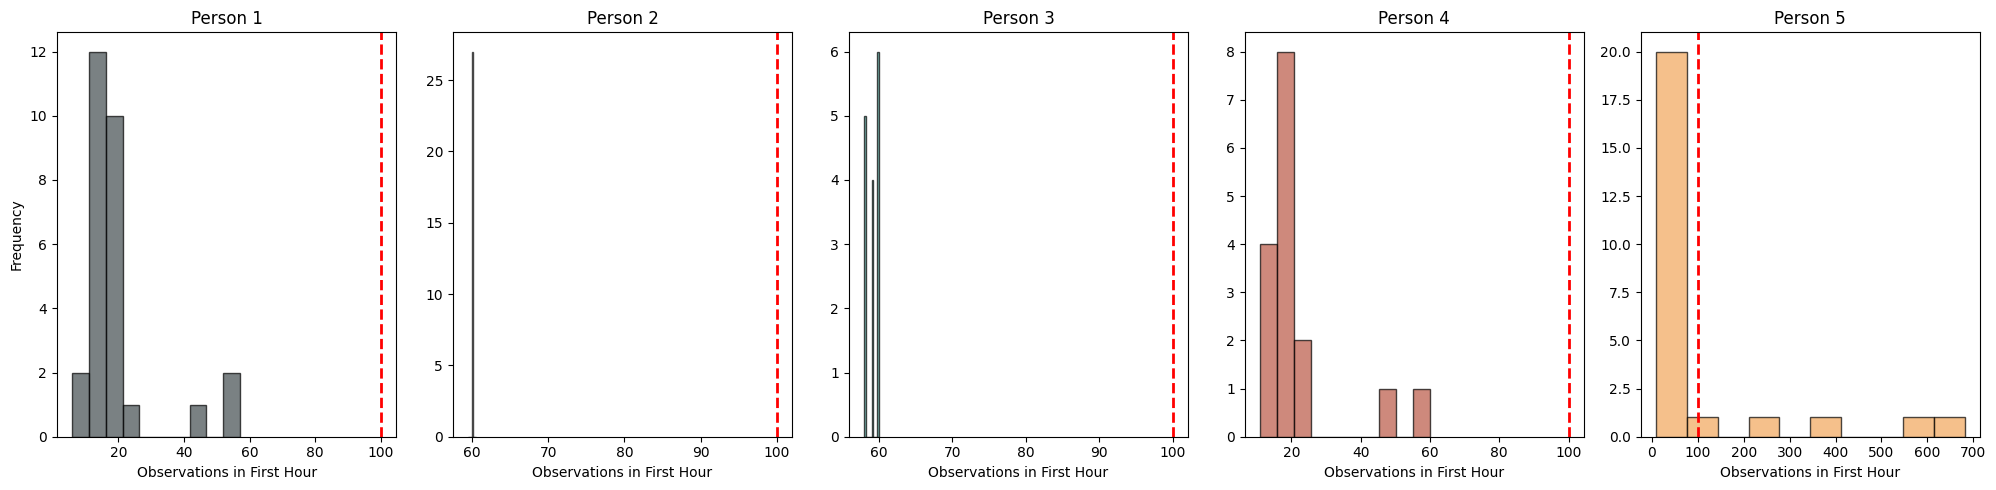

In [16]:
def plot_individual_observation_histograms(aggregated_df, heart_rate_df):
    time_interval = 60  # 60 minutes after waking up
    observation_data = []

    # Define a color palette for the persons
    palette = ['#424c4eff', '#d3d3d3ff', '#4b9f94ff', '#ba5745ff', '#f2a65aff']  # Added one more color

    # Group the data by Person ID
    grouped_data = aggregated_df.groupby('Person ID')

    for person_id, person_data in grouped_data:
        for _, row in person_data.iterrows():
            temp_df = functions.get_heartrate_data_for_interval(heart_rate_df, row['Person ID'], row['Date'], row['time_of_awakening'], time_interval)
            observation_count = len(temp_df)
            observation_data.append((person_id, observation_count))

    # Convert to DataFrame for easier plotting
    observation_df = pd.DataFrame(observation_data, columns=['Person ID', 'Observation Count'])

    # Create subplots
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    # Plot histogram for each person
    for i, (ax, person_id) in enumerate(zip(axes, observation_df['Person ID'].unique())):
        person_data = observation_df[observation_df['Person ID'] == person_id]
        ax.hist(person_data['Observation Count'], color=palette[i % len(palette)], alpha=0.7, edgecolor='black')
        ax.axvline(x=100, color='red', linestyle='--', linewidth=2)
        ax.set_title(f'Person {person_id}')
        ax.set_xlabel('Observations in First Hour')
        if i == 0:
            ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function
plot_individual_observation_histograms(aggregated_df, heart_rate_df)

### Distribution of the amount of sleep per person

In [19]:
selected_columns = ['duration', 'Person ID', 'sleep_deep_duration', 'sleep_rem_duration', 'sleep_light_duration', 'sleep_awake_duration']
filtered_data = x_sleep_df[selected_columns]

# Renaming 'total_sleep_duration' to 'duration' in apple_sleep_data
apple_sleep_data = a_sleep_df.rename(columns={'total_sleep_duration': 'duration'})
apple_sleep_data['Person ID'] = 5
apple_sleep_data = apple_sleep_data[selected_columns]
# Append apple_sleep_data to filtered_data
filtered_data = pd.concat([filtered_data, apple_sleep_data], ignore_index=True)

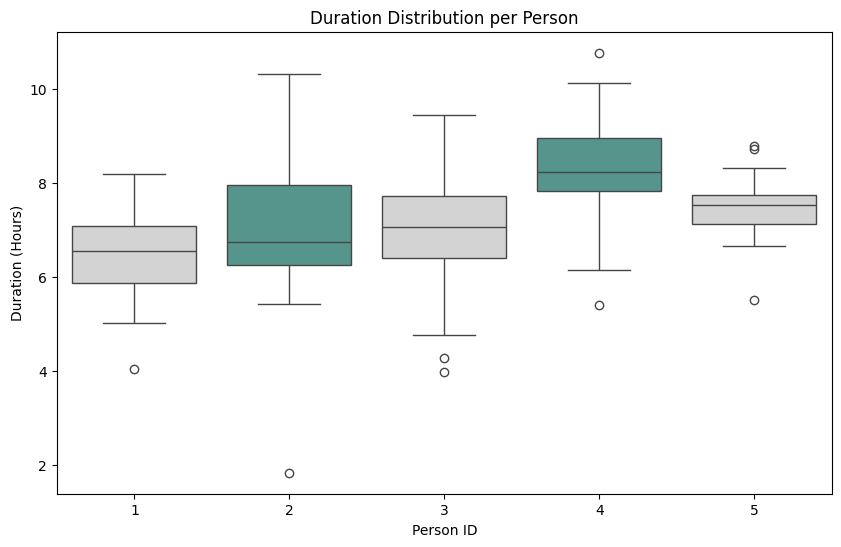

In [20]:
import seaborn as sns
# Convert 'duration' from minutes to hours
filtered_data['duration'] = filtered_data['duration'] / 60

# Creating a boxplot for duration per person
plt.figure(figsize=(10, 6))
sns.boxplot(x='Person ID', y='duration', data=filtered_data, palette=['#D3D3D3', '#4B9F94'])

# Adding labels and title
plt.xlabel('Person ID')
plt.ylabel('Duration (Hours)')
plt.title('Duration Distribution per Person')

# Show the plot
plt.show()

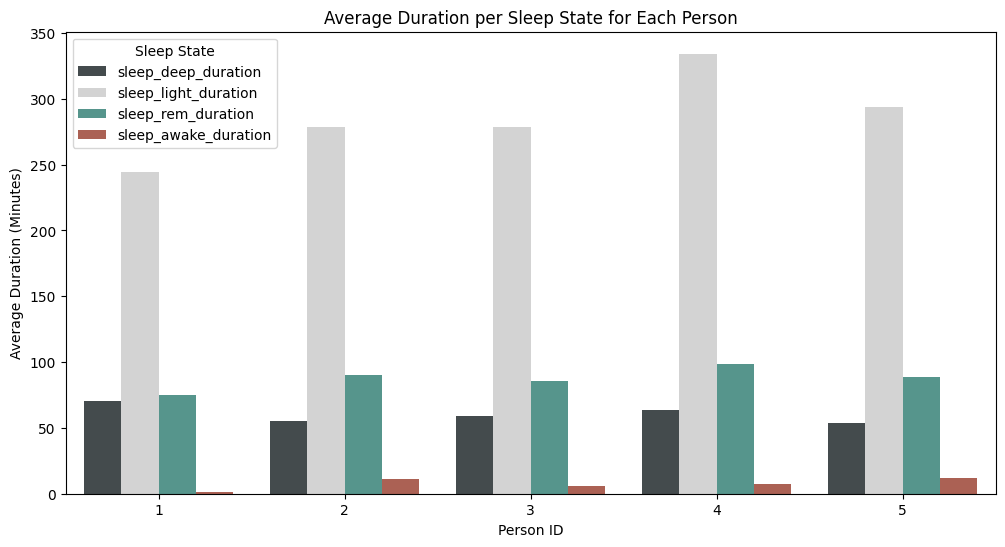

In [21]:
persons = [1, 2, 3, 4, 5]
filtered_data = filtered_data[filtered_data['Person ID'].isin(persons)]

# Calculate the average duration for each sleep state per person
avg_durations = filtered_data.groupby('Person ID')[['sleep_deep_duration', 'sleep_light_duration', 'sleep_rem_duration', 'sleep_awake_duration']].mean()

# Reshaping the DataFrame for easier plotting
avg_durations = avg_durations.reset_index().melt(id_vars='Person ID', var_name='Sleep State', value_name='Average Duration')

# Creating a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Person ID', y='Average Duration', hue='Sleep State', data=avg_durations, palette=['#424c4eff', '#d3d3d3ff', '#4b9f94ff', '#ba5745ff'])

# Adding labels and title
plt.xlabel('Person ID')
plt.ylabel('Average Duration (Minutes)')
plt.title('Average Duration per Sleep State for Each Person')

# Show the plot
plt.show()